## **Section 0** - ESSENTIALS: Install and load libraries
- Even though we clone our own github repo to access our developed modules, we still to install the library dependencies.

In [ ]:
!pip install rarfile
!pip install gitpython
!pip install ta
!pip install hurst
!pip install catboost
# pip install bayes_opt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=889a76bfd693e74e24975b00d777feb435c50af7bde67d5313f557307f656f45
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


### Clone/Reclone the repo to pull in the latest updates.
- When you need to do this, uncomment the below code and run.

# Introduction:
- This notebook pulls in minutely data from Github repo. **Class TickerData** and its functions help to do that.
https://github.com/laughingbud/capstone/tree/main/Data
- Exploratory research is then conducted on the data using the **class Exploratory** and its functions
- Technical indicators are defined and built in the **class Strategy**. The function calculate_analytics takes the return series of any strategy and returns sharpe ratio, annual return, vol,etc type of analytics.
## Work so far:
Note: Only tested 'Bank Nifty' ticker but can be expanded later
- Till now we explored mean reversion strategy using Bollinger bands strategy and did robustness testing by varying look back window, band size and implementation lag(shift signal by 2 or more).
- We also explored seasonality strategy by looking at different seasonality windows where autocorrelations are statistically signficant.
## Next step:
- Develop strategies (mean reversion or trend) using other technical indicators. We are aiming to have around 12-15 technical indicator strategies at the minimum.
- Develop a cross sectional strategy (elaborated on the email to Prof.Rito) with a bigger universe.
- If still have time, explore ML based strategy using all these technical indicators to forecast return minutes (5mins,10,15,30, 1hour, 4hour,upto daily) ahead.


In [ ]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib

In [ ]:
repo_url = 'https://github.com/laughingbud/capstone.git'
repo_name = re.search(r'/([^/]+)\.git$', repo_url).group(1)

if os.path.exists(f'/content/{repo_name}'):
    %cd /content/capstone
    !git pull
    import importlib
    import Exploratory
    importlib.reload(Exploratory)
    import Strategy
    importlib.reload(Strategy)
    import TickerData
    importlib.reload(TickerData)
    # !rm -rf '/content/capstone'
    # %cd content
else:
    %cd /content/
    !git clone https://github.com/laughingbud/capstone.git

/content
Cloning into 'capstone'...
remote: Enumerating objects: 14919, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 14919 (delta 92), reused 60 (delta 8), pack-reused 14726 (from 1)
Receiving objects: 100% (14919/14919), 874.09 MiB | 14.88 MiB/s, done.
Resolving deltas: 100% (164/164), done.
Updating files: 100% (15824/15824), done.


# 1. Classes
-  TickerData - mainly for data import from YF and storing in git repo
-  Exploratory - For exploring interesting patterns and characteristics about data
-  Strategy - For strategy and feature creation

In [ ]:
%cd /content/capstone
from TickerData import TickerData
from Exploratory import Exploratory
from Strategy import Strategy

/content/capstone


### Import data

In [ ]:
repo_url = 'https://github.com/laughingbud/capstone'
td = TickerData(repo_url=repo_url)

In [ ]:
minutely_tickers,ticker_dict = td.get_minutely_tickers()
# ticker_dict

15817 CSV files found: ['/content/capstone/Data/Futures IEOD-October 2023/BIOCON_F3.csv', '/content/capstone/Data/Futures IEOD-October 2023/TRENT_F1.csv', '/content/capstone/Data/Futures IEOD-October 2023/DABUR_F3.csv', '/content/capstone/Data/Futures IEOD-October 2023/PIIND_F3.csv', '/content/capstone/Data/Futures IEOD-October 2023/RBLBANK_F2.csv', '/content/capstone/Data/Futures IEOD-October 2023/LICHSGFIN_F1.csv', '/content/capstone/Data/Futures IEOD-October 2023/DABUR_F2.csv', '/content/capstone/Data/Futures IEOD-October 2023/COLPAL_F1.csv', '/content/capstone/Data/Futures IEOD-October 2023/SUNTV_F1.csv', '/content/capstone/Data/Futures IEOD-October 2023/UPL_F1.csv', '/content/capstone/Data/Futures IEOD-October 2023/IEX_F1.csv', '/content/capstone/Data/Futures IEOD-October 2023/PVRINOX_F3.csv', '/content/capstone/Data/Futures IEOD-October 2023/ABB_F2.csv', '/content/capstone/Data/Futures IEOD-October 2023/MARUTI_F2.csv', '/content/capstone/Data/Futures IEOD-October 2023/RECLTD_F1.c

In [ ]:
bank_nifty_f1 = td.load_minutely_data(ticker='BANKNIFTY',filter='F1')

Reading CSV file: /content/capstone/Data/Futures IEOD-October 2023/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-January 2022/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-March 2022/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-February 2023/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-September 2022/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-December 2022/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-September 2023/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-August 2022/BANKNIFTY_F1.csv
Reading CSV file: /content/capstone/Data/Futures IEOD-June 2023/BANKNIFTY_F1.csv
Actual number of columns 10
Expected number of columns 9
The CSV file: /content/capstone/Data/Futures IEOD-June 2023/BANKNIFTY_F1.csv has column mismatch.
Expected columns: Index(['ticker', 'date', 'time', 'open', 'high', 'low', 'close', 'volum

In [ ]:
bank_nifty_f1.head()

ticker      open      high       low     close  \
datetime                                                                    
2022-01-03 09:15:00  BANKNIFTY_F1  36621.00  36621.00  35708.05  35811.85   
2022-01-03 09:16:00  BANKNIFTY_F1  35813.95  35825.75  35798.70  35798.70   
2022-01-03 09:17:00  BANKNIFTY_F1  35796.55  35796.90  35757.40  35782.60   
2022-01-03 09:18:00  BANKNIFTY_F1  35782.60  35834.25  35782.60  35834.25   
2022-01-03 09:19:00  BANKNIFTY_F1  35830.50  35839.65  35823.40  35835.00   

                     volume       OI    return  
datetime                                        
2022-01-03 09:15:00   82603  2347925  0.000000  
2022-01-03 09:16:00   38900  2347925 -0.000367  
2022-01-03 09:17:00   28775  2368975 -0.000450  
2022-01-03 09:18:00   28900  2368975  0.001442  
2022-01-03 09:19:00   28275  2368975  0.000021

In [ ]:
minutely_tickers # Show all tickers

['AARTIIND',
 'ABB',
 'ABBOTINDIA',
 'ABCAPITAL',
 'ABFRL',
 'ACC',
 'ADANIENT',
 'ADANIPORTS',
 'ALKEM',
 'AMBUJACEM',
 'APOLLOHOSP',
 'APOLLOTYRE',
 'ASHOKLEY',
 'ASIANPAINT',
 'ASTRAL',
 'ATUL',
 'AUBANK',
 'AUROPHARMA',
 'AXISBANK',
 'BAJAJFINSV',
 'BAJFINANCE',
 'BALKRISIND',
 'BALRAMCHIN',
 'BANDHANBNK',
 'BANKBARODA',
 'BANKNIFTY',
 'BATAINDIA',
 'BEL',
 'BERGEPAINT',
 'BHARATFORG',
 'BHARTIARTL',
 'BHEL',
 'BIOCON',
 'BOSCHLTD',
 'BPCL',
 'BRITANNIA',
 'BSOFT',
 'CANBK',
 'CANFINHOME',
 'CHAMBLFERT',
 'CHOLAFIN',
 'CIPLA',
 'COALINDIA',
 'COFORGE',
 'COLPAL',
 'CONCOR',
 'COROMANDEL',
 'CROMPTON',
 'CUB',
 'CUMMINSIND',
 'DABUR',
 'DALBHARAT',
 'DEEPAKNTR',
 'DELTACORP',
 'DIVISLAB',
 'DIXON',
 'DLF',
 'DRREDDY',
 'EICHERMOT',
 'ESCORTS',
 'EXIDEIND',
 'FEDERALBNK',
 'FINNIFTY',
 'GAIL',
 'GLENMARK',
 'GMRINFRA',
 'GNFC',
 'GODREJCP',
 'GODREJPROP',
 'GRANULES',
 'GRASIM',
 'GUJGASLTD',
 'HAL',
 'HAVELLS',
 'HCLTECH',
 'HDFC',
 'HDFCAMC',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO'

In [ ]:
# index_tickers
index_tickers = [x for x in minutely_tickers if 'NIFTY' in x]
print('Index futures tickers:',index_tickers)

Index futures tickers: ['BANKNIFTY', 'FINNIFTY', 'MIDCPNIFTY', 'NIFTY']


In [ ]:
equity_tickers = [x for x in minutely_tickers if 'NIFTY' not in x]
print('Equity futures tickers:',equity_tickers)

Equity futures tickers: ['AARTIIND', 'ABB', 'ABBOTINDIA', 'ABCAPITAL', 'ABFRL', 'ACC', 'ADANIENT', 'ADANIPORTS', 'ALKEM', 'AMBUJACEM', 'APOLLOHOSP', 'APOLLOTYRE', 'ASHOKLEY', 'ASIANPAINT', 'ASTRAL', 'ATUL', 'AUBANK', 'AUROPHARMA', 'AXISBANK', 'BAJAJFINSV', 'BAJFINANCE', 'BALKRISIND', 'BALRAMCHIN', 'BANDHANBNK', 'BANKBARODA', 'BATAINDIA', 'BEL', 'BERGEPAINT', 'BHARATFORG', 'BHARTIARTL', 'BHEL', 'BIOCON', 'BOSCHLTD', 'BPCL', 'BRITANNIA', 'BSOFT', 'CANBK', 'CANFINHOME', 'CHAMBLFERT', 'CHOLAFIN', 'CIPLA', 'COALINDIA', 'COFORGE', 'COLPAL', 'CONCOR', 'COROMANDEL', 'CROMPTON', 'CUB', 'CUMMINSIND', 'DABUR', 'DALBHARAT', 'DEEPAKNTR', 'DELTACORP', 'DIVISLAB', 'DIXON', 'DLF', 'DRREDDY', 'EICHERMOT', 'ESCORTS', 'EXIDEIND', 'FEDERALBNK', 'GAIL', 'GLENMARK', 'GMRINFRA', 'GNFC', 'GODREJCP', 'GODREJPROP', 'GRANULES', 'GRASIM', 'GUJGASLTD', 'HAL', 'HAVELLS', 'HCLTECH', 'HDFC', 'HDFCAMC', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDCOPPER', 'HINDPETRO', 'HINDUNILVR', 'IBULHSGFIN', 'ICICIBANK'

In [ ]:
print(f'Total number of futures tickers: {len(minutely_tickers)}')
print(f'Total number of index futures tickers: {len(index_tickers)}')
print(f'Total number of equity futures tickers: {len(equity_tickers)}')

Total number of futures tickers: 186
Total number of index futures tickers: 4
Total number of equity futures tickers: 182


In [ ]:
data_summary = pd.DataFrame(ticker_dict).T
data_summary.index.name = 'Tickers'
data_summary.tail()

files  \
Tickers                                                        
VEDL       [/content/capstone/Data/Futures IEOD-October 2...   
VOLTAS     [/content/capstone/Data/Futures IEOD-October 2...   
WIPRO      [/content/capstone/Data/Futures IEOD-October 2...   
ZEEL       [/content/capstone/Data/Futures IEOD-October 2...   
ZYDUSLIFE  [/content/capstone/Data/Futures IEOD-October 2...   

                                                      months n_months n_files  
Tickers                                                                        
VEDL       [Futures IEOD-August 2023, Futures IEOD-April ...       24      72  
VOLTAS     [Futures IEOD-August 2023, Futures IEOD-April ...       24      72  
WIPRO      [Futures IEOD-August 2023, Futures IEOD-April ...       24      72  
ZEEL       [Futures IEOD-August 2023, Futures IEOD-April ...       24      72  
ZYDUSLIFE  [Futures IEOD-August 2023, Futures IEOD-April ...       22      66

In [ ]:
# ticker_dict['INDUSTOWER']['files']

In [ ]:
# data_summary.loc['INDUSTOWER']['files']

In [ ]:
# data_summary['n_months'].sort_values().head(50).plot(kind='bar',figsize=(20,5),
#                                             title='Number of months of data')

#### Of the 186 unique tickers, almost all of them have 24 months of data, except seven (left-most in the above chart) firms - PVRINOX, LTIM, SRIRAMFIN,RAIN, INTELLECT, MOTHERSON, ZYDUSLIFE.

In [ ]:
# data_summary['n_files'].sort_values().head(50).plot(kind='bar',figsize=(20,5),
#                                                     title='Number of files for each ticker')

In [ ]:
# ticker_dict['NIFTY']

In [ ]:
# nifty_f1 = td.load_minutely_data(ticker='NIFTY',filter='F1') ,infer_datetime_format=True

In [ ]:
# midcp_nifty_f1 = td.load_minutely_data(ticker='MIDCPNIFTY',filter='F1')

In [ ]:
# bank_nifty_f2 = td.load_minutely_data(ticker='BANKNIFTY',filter='F2')

In [ ]:
# bank_nifty_f1.head(2)

In [ ]:
# bank_nifty_f1.tail(2)

In [ ]:
bank_nifty_f1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184603 entries, 2022-01-03 09:15:00 to 2023-12-29 15:30:00
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ticker  184603 non-null  object 
 1   open    184603 non-null  float64
 2   high    184603 non-null  float64
 3   low     184603 non-null  float64
 4   close   184603 non-null  float64
 5   volume  184603 non-null  int64  
 6   OI      184603 non-null  int64  
 7   return  184603 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 12.7+ MB


In [ ]:
bank_nifty_f1.describe()

open           high           low          close  \
count  184603.000000  184603.000000  184603.00000  184603.000000   
mean    40837.446985   40848.877055   40826.08283   40837.489332   
std      3814.313773    3812.615708    3815.91624    3814.308178   
min     32261.000000   32300.750000   32251.35000   32253.050000   
25%     37906.675000   37920.850000   37891.62500   37906.025000   
50%     41499.700000   41510.000000   41488.05000   41499.000000   
75%     43954.898400   43963.224600   43945.77540   43954.898400   
max     48751.000000   48805.000000   48716.25000   48758.449200   

              volume            OI         return  
count  184603.000000  1.846030e+05  184603.000000  
mean     9226.980986  2.214122e+06       0.000002  
std     11538.802848  4.908666e+05       0.000569  
min        15.000000  0.000000e+00      -0.028878  
25%      3000.000000  1.993005e+06      -0.000212  
50%      5715.000000  2.265375e+06       0.000000  
75%     11125.000000  2.496375e+06       0.000213  
max    427401.000000  3.866500e+06       0.027743

In [ ]:
bank_nifty_f1.isna().sum().rename('NaNs').to_frame().T

ticker  open  high  low  close  volume  OI  return
NaNs       0     0     0    0      0       0   0       0

In [ ]:
# fig,ax = plt.subplots(1,2,figsize=(18,5))
# bank_nifty_f1['volume'].plot(title='Bank Nifty F1 - Volume',
#                              label='F1',ax=ax[0])
# # plt.show()
# bank_nifty_f2['volume'].plot(title='Bank Nifty F2 - Volume',
#                              label='F2',ax=ax[1])
# plt.tight_layout()
# plt.show()

In [ ]:
# bank_nifty_f1['o/i'].plot(figsize=(12,5),title='Bank Nifty - Open-Interest')
# bank_nifty_f2['o/i'].plot(figsize=(12,5),title='Bank Nifty - Open-Interest')
# plt.legend(['F1','F2'])

In [ ]:
# bank_nifty_f1['return'] = np.log(bank_nifty_f1['close'] / bank_nifty_f1['close'].shift(1))

# 2. Exploratory research

In [ ]:
data = bank_nifty_f1.copy()
print(f'Shape of data is {data.shape}')
data_ins = bank_nifty_f1.iloc[:int(bank_nifty_f1.shape[0]*0.8),:].copy()
print(f'Shape of in-sample data is {data_ins.shape}')
data_oos = bank_nifty_f1.iloc[int(bank_nifty_f1.shape[0]*0.8):,:].copy()
print(f'Shape of out-sample data is {data_oos.shape}')

Shape of data is (184603, 8)
Shape of in-sample data is (147682, 8)
Shape of out-sample data is (36921, 8)


In [ ]:
bank_nifty_f1.columns

Index(['ticker', 'open', 'high', 'low', 'close', 'volume', 'OI', 'return'], dtype='object')

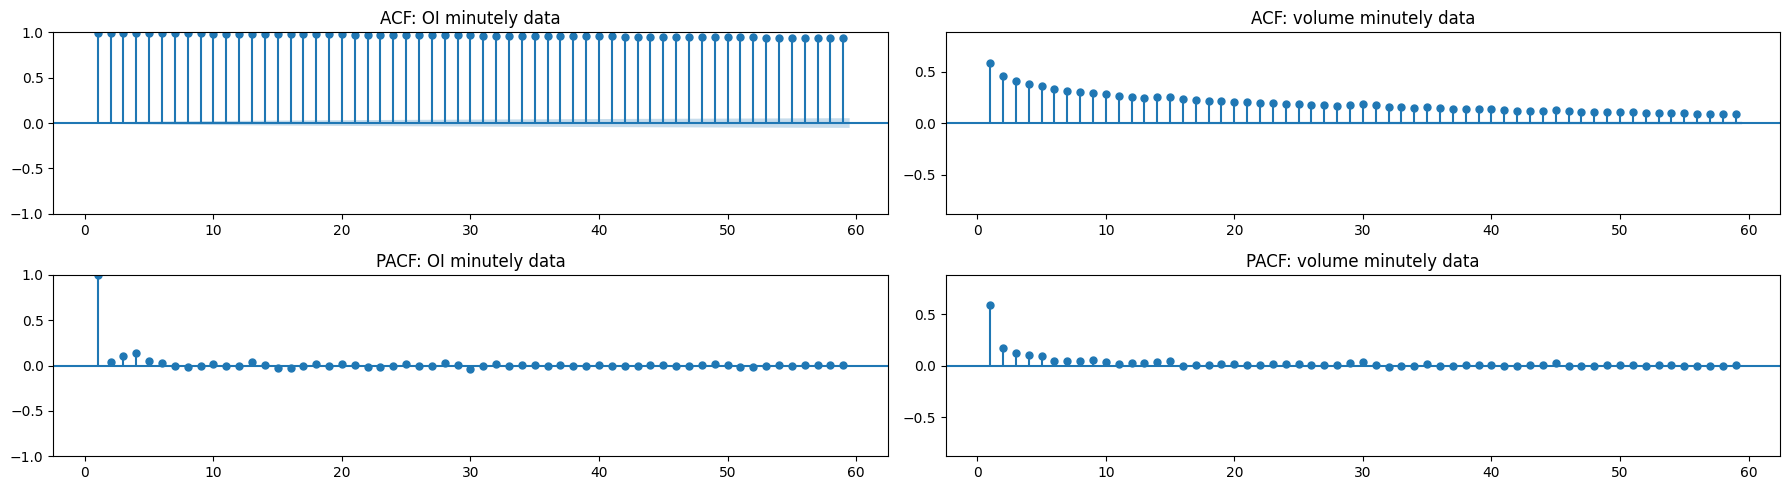

In [ ]:
exp = Exploratory()
exp.plot_autocorrelations(data_ins[['OI','volume']],maxlags=60,label='minutely data')

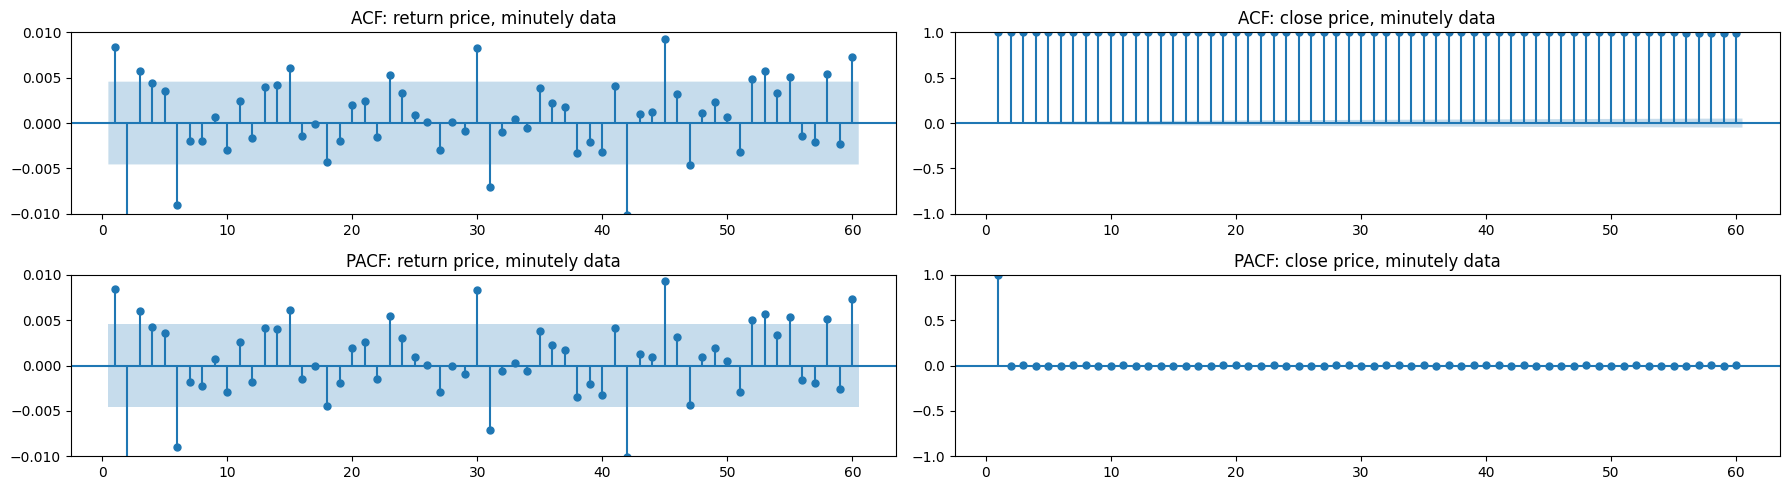

In [ ]:
exp.plot_autocorrelations(bank_nifty_f1[['return','close']].dropna(),maxlags=61,label='price, minutely data')

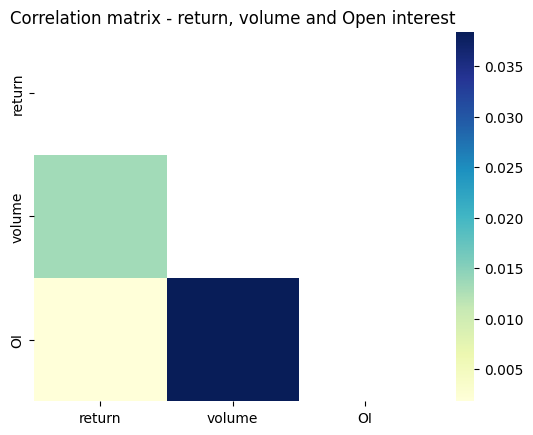

In [ ]:
exp.plot_corr(data_ins[['return','volume','OI']],
              title='Correlation matrix - return, volume and Open interest')
plt.show()

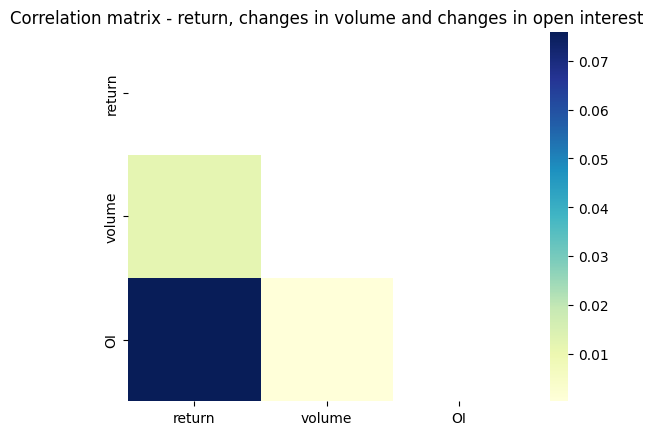

In [ ]:
exp.plot_corr(pd.concat([bank_nifty_f1[['return']],
                         bank_nifty_f1[['volume','OI']].diff()],axis=1),
              title='Correlation matrix - return, changes in volume and changes in open interest')
plt.show()

## 3 Strategy development

### 3.1 Bollinger band - Mean reversion

In [ ]:
st = Strategy()

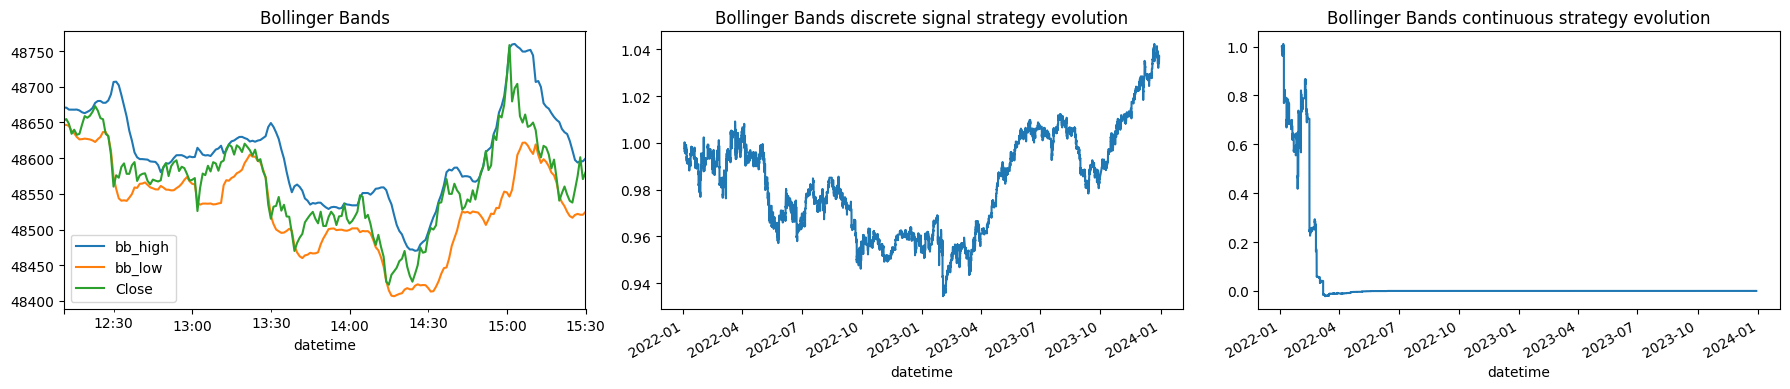

In [ ]:
bb_high,bb_low,bb_sig_discrete,bb_sig_cont = st.bb_signal(bank_nifty_f1.copy(),window=10)
fig,ax = plt.subplots(1,3,figsize=(18,4))

pd.DataFrame({'bb_high':bb_high,
              'bb_low':bb_low,
              'Close':bank_nifty_f1['close'],
              },index=bank_nifty_f1.index).tail(200).plot(ax=ax[0],title='Bollinger Bands')

(1+pd.Series(bb_sig_discrete,index=bank_nifty_f1.index).shift(1)*bank_nifty_f1['return']).cumprod().plot(ax=ax[1],title='Bollinger Bands discrete signal strategy evolution')

(1+pd.Series(bb_sig_cont,index=bank_nifty_f1.index).shift(1)*bank_nifty_f1['return']).cumprod().plot(ax=ax[2],title='Bollinger Bands continuous strategy evolution')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Bollinger Bands discrete signal evolution'}, xlabel='datetime'>

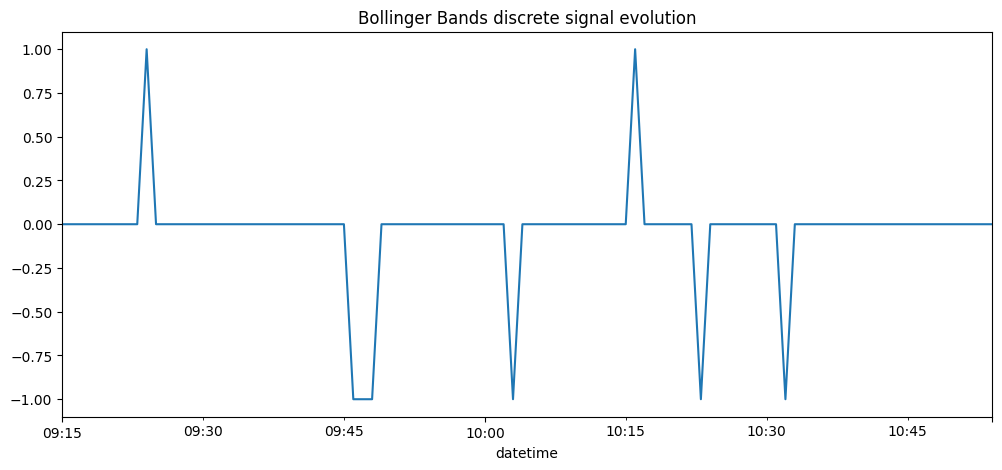

In [ ]:
pd.Series(bb_sig_discrete,index=bank_nifty_f1.index).head(100).plot(figsize=(12,5),title='Bollinger Bands discrete signal evolution')
# pd.Series(bb_sig_cont,index=bank_nifty_f1.index).head(100).plot()

### Robustness check - Bollinger bands strategy

In [ ]:
# _,_,bb_signal = st.bb_signal(data,window=15,
#                                      window_dev=2)
# pd.Series(bb_signal,index=data.index).shift(1).plot(figsize=(12,5),title='Bollinger Bands signal evolution')
# # (1+pd.Series(bb_signal,index=data.index).shift(1)*data['return']).cumprod().head(200).plot()

In [ ]:
def test_robustness(data,indicator,multiplier,lookback_window,band_tol,lags):
    if multiplier not in (1, -1):
        raise ValueError("Multiplier must be either 1 or -1")
    results = []
    ts = {'signal': {}, 'strategy_returns': {}, 'cumulative_returns': {}}
    fig,ax = plt.subplots(1,band_tol['end'],figsize=(18,4))
    for band_tol in range(band_tol['start'],band_tol['end']+band_tol['step'],
                          band_tol['step']):
        legend = []
        for window in range(lookback_window['start'],
                            lookback_window['end']+lookback_window['step'],
                            lookback_window['step']):
            _,_,bb_signal,_ = st.bb_signal(data,window=window,
                                         window_dev=band_tol)
            (1+pd.Series(bb_signal,index=data.index).shift(1)*data['return']).cumprod().plot(
                title=f'{indicator} strategy,band_tol={band_tol},no lag',ax=ax[band_tol-1])
            legend.append(f'window={window}')
            for lag in range(lags['start'],lags['end']+lags['step'],lags['step']):
                data['signal'] = pd.Series(bb_signal, index=data.index).shift(lag).fillna(0)
                strategy_returns = multiplier * data['signal'] * data['return']
                # Identify the start and end of holding periods
                data['holding'] = pd.Series(bb_signal, index=data.index).shift(lag).diff().fillna(0).abs()
                data['holding'] = data['holding'].cumsum()
                # Calculate the duration of each holding period
                holding_periods = data[data['signal'] != 0].groupby('holding').size()
                # Check if holding_periods is empty, and if so, set holding_period to NaN
                # Otherwise calculate and round as before
                if holding_periods.empty:
                    holding_period = np.nan  # Use float('nan') for consistency
                else:
                    holding_period = holding_periods.mean().round(1)

                analytics = st.calculate_analytics(strategy_returns)
                results.append({
                    'Indicator': indicator,
                    'Strategy': 'Mean reversion' if multiplier==1 else 'Momentum',
                    'band tolerance': band_tol,
                    'lookback window': window,
                    'lag': lag,
                    'holding period': holding_period,
                    **analytics
                })
                key = f'b{band_tol}w{window}l{lag}'
                ts['signal'][key] = data['signal'].to_frame(key)
                ts['strategy_returns'][key] = strategy_returns.to_frame(key)
                ts['cumulative_returns'][key] = (1+strategy_returns).cumprod().to_frame(key)

        ax[band_tol-1].legend(legend,loc='upper left')
        if band_tol==1:
            ax[band_tol-1].set_ylabel('Cumulative return')
    plt.tight_layout()
    plt.show()

    analytics = pd.DataFrame(results).fillna(0)
    display(analytics)
    return analytics,ts

def plot_robustness(insample,outofsample,attrib_dict,label):
    legend = ['In sample','Out of sample']
    # label = f'{label}: {attrib_dict["y"]},{attrib_dict["row"]}='
    lags=outofsample[attrib_dict["row"]].unique().tolist()
    band_tol = outofsample[attrib_dict["col"]].unique().tolist()

    fig,ax=plt.subplots(len(band_tol),len(lags),figsize=(12,14))
    for i in range(len(band_tol)):
        for j in range(len(lags)):
            insample.loc[(insample[attrib_dict['row']]==lags[j])&(insample[attrib_dict['col']]==band_tol[i]),
            [attrib_dict['y'],attrib_dict['x']]].set_index(attrib_dict['x']).plot.bar(
                title=f'{label},{attrib_dict["row"]}={lags[j]},{attrib_dict["col"]}={band_tol[i]}',
                ax=ax[i,j],width=0.3, position=1)

            outofsample.loc[(outofsample[attrib_dict['row']]==lags[j])&(outofsample[attrib_dict['col']]==band_tol[i]),
            [attrib_dict['y'],attrib_dict['x']]].set_index(attrib_dict['x']).plot.bar(
                ax=ax[i,j],width=0.3,color='orange', position=0)
            # Adjust the x-axis to prevent overlap
            ax[i, j].set_xlim(left=-0.5)
            ax[i, j].legend(legend)
            if j==0:
                ax[i, j].set_ylabel(attrib_dict["y"])  # Set the y-axis label

    plt.tight_layout()
    plt.show()

def percentile_charts(ts_data,percentile_x,label):
    # Get final values for all strategies
    final_values = [data.iloc[-1,0] for data in ts_data['cumulative_returns'].values()]

    # Calculate x percentile
    percentile_90 = np.percentile(final_values, percentile_x)

    plt.figure(figsize=(12, 5))
    for strategy, data in ts_data['cumulative_returns'].items():
        if data.iloc[-1,0] > percentile_90:
            plt.plot(data, label=strategy)  # Plot data with strategy as label

    plt.title(f'{label}: Top {100-percentile_x} percentile strategies - Out of sample evolution')
    plt.ylabel('Cumulative Returns (Gross)')  # Add y-axis label
    plt.legend()  # Display legend to identify strategies
    plt.show()

    # Calculate 100-x percentile
    percentile_10 = np.percentile(final_values, 100-percentile_x)

    plt.figure(figsize=(12, 5))
    for strategy, data in ts_data['cumulative_returns'].items():
        if data.iloc[-1,0] < percentile_10:
            plt.plot(data, label=strategy)  # Plot data with strategy as label

    plt.title(f'{label}: Bottom {100-percentile_x} percentile strategies - Out of sample evolution')
    plt.ylabel('Cumulative Returns (Gross)')  # Add y-axis label
    plt.legend()  # Display legend to identify strategies
    plt.show()

In [ ]:
lookback_window = {'start':5,
                   'step':10,
                   'end':60}# exclusive
band_tolerance = {'start':1,
                  'step':1,
                  'end':4}#inclusive
lags = {'start':2, #Shift the signal by 2 or more for realistic implementation
        'step':1,
        'end':4}#inclusive

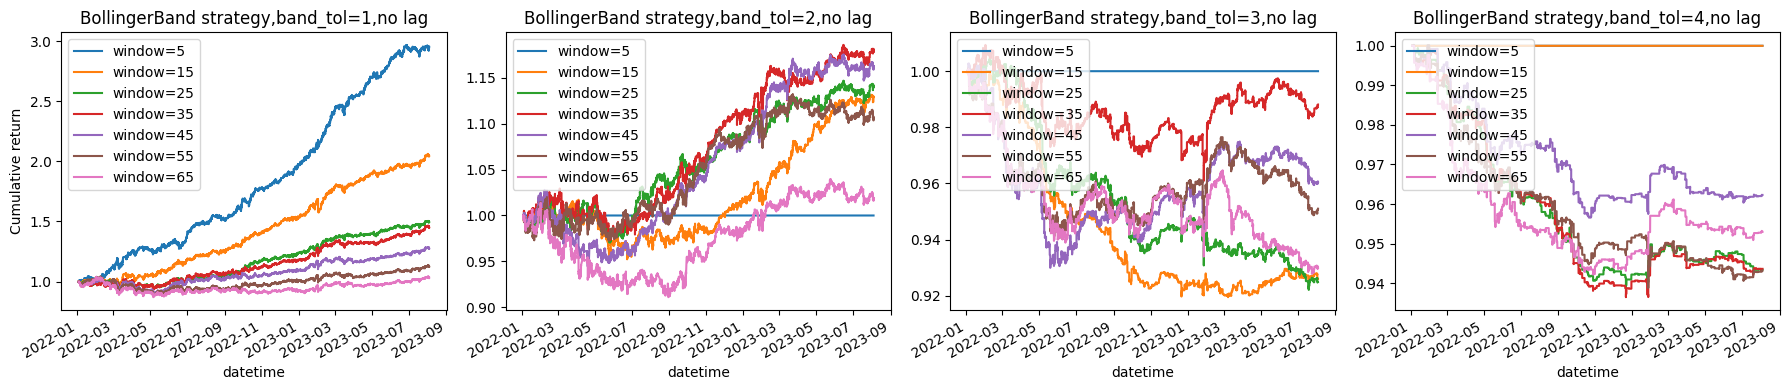

Indicator        Strategy  band tolerance  lookback window  lag  \
0   BollingerBand  Mean reversion               1                5    2   
1   BollingerBand  Mean reversion               1                5    3   
2   BollingerBand  Mean reversion               1                5    4   
3   BollingerBand  Mean reversion               1               15    2   
4   BollingerBand  Mean reversion               1               15    3   
..            ...             ...             ...              ...  ...   
79  BollingerBand  Mean reversion               4               55    3   
80  BollingerBand  Mean reversion               4               55    4   
81  BollingerBand  Mean reversion               4               65    2   
82  BollingerBand  Mean reversion               4               65    3   
83  BollingerBand  Mean reversion               4               65    4   

    holding period  Sharpe Ratio  Sortino Ratio  Max Drawdown  VaR(95%)  \
0              1.9           3.8            3.2      0.002126 -0.000529   
1              1.9          -0.3           -0.3      0.115800 -0.000537   
2              1.9          -1.1           -0.9      0.251454 -0.000536   
3              3.5           2.4            2.0      0.021917 -0.000548   
4              3.5          -0.4           -0.3      0.169195 -0.000551   
..             ...           ...            ...           ...       ...   
79             1.7          -2.1           -0.2      0.028182  0.000000   
80             1.7          -2.0           -0.2      0.019280  0.000000   
81             1.9          -2.3           -0.2      0.033241  0.000000   
82             1.9          -2.4           -0.2      0.032850  0.000000   
83             1.9          -2.3           -0.2      0.021779  0.000000   

    Expected shortfall(95%)  Ann. return  Ann. vol  
0             -9.730319e-04        0.531     0.136  
1             -9.615055e-04       -0.019     0.128  
2             -9.607888e-04       -0.115     0.128  
3             -9.895908e-04        0.336     0.133  
4             -9.891908e-04       -0.030     0.131  
..                      ...          ...       ...  
79            -9.945921e-07       -0.010     0.015  
80            -9.319684e-07       -0.009     0.014  
81            -1.090951e-06       -0.014     0.015  
82            -1.052041e-06       -0.014     0.014  
83            -9.526848e-07       -0.010     0.013  

[84 rows x 13 columns]

In [ ]:
BB_meanrev_is,BB_meanrev_ts_is = test_robustness(data_ins.copy(),
                                                 indicator='BollingerBand',
                                                 multiplier=1, # 1 for mean reversion, -1 for momentum
                                                 lookback_window=lookback_window,
                                                 band_tol=band_tolerance, lags=lags)

In [ ]:
# BB_meanrev_ts_is['signal']['b1w5l2'].head(10)#.plot(figsize=(12,5),title='Bollinger Bands discrete signal evolution')

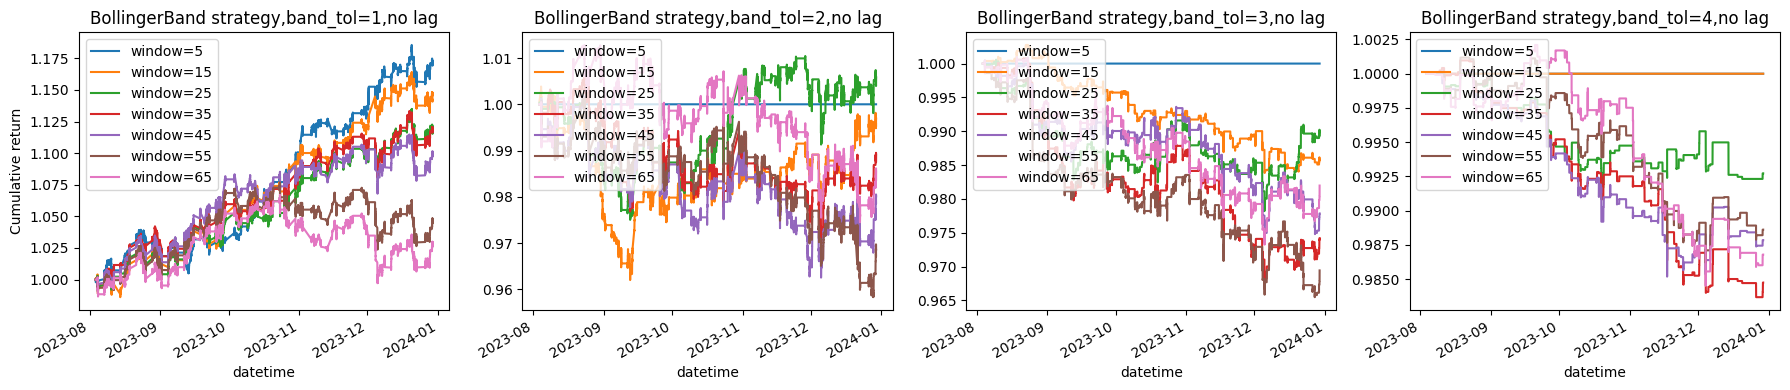

Indicator        Strategy  band tolerance  lookback window  lag  \
0   BollingerBand  Mean reversion               1                5    2   
1   BollingerBand  Mean reversion               1                5    3   
2   BollingerBand  Mean reversion               1                5    4   
3   BollingerBand  Mean reversion               1               15    2   
4   BollingerBand  Mean reversion               1               15    3   
..            ...             ...             ...              ...  ...   
79  BollingerBand  Mean reversion               4               55    3   
80  BollingerBand  Mean reversion               4               55    4   
81  BollingerBand  Mean reversion               4               65    2   
82  BollingerBand  Mean reversion               4               65    3   
83  BollingerBand  Mean reversion               4               65    4   

    holding period  Sharpe Ratio  Sortino Ratio  Max Drawdown  VaR(95%)  \
0              1.9           3.4            3.1      0.010546 -0.000354   
1              1.9           1.4            1.2      0.030755 -0.000342   
2              1.9           1.2            1.1      0.021227 -0.000344   
3              3.3           2.0            1.7      0.023557 -0.000359   
4              3.3           1.0            0.8      0.017014 -0.000352   
..             ...           ...            ...           ...       ...   
79             1.7          -4.9           -0.5      0.011339  0.000000   
80             1.7          -5.6           -0.6      0.012996  0.000000   
81             2.0          -2.3           -0.3      0.008774  0.000000   
82             2.0          -5.1           -0.6      0.012687  0.000000   
83             2.0          -5.3           -0.6      0.013066  0.000000   

    Expected shortfall(95%)  Ann. return  Ann. vol  
0             -6.491297e-04        0.323     0.090  
1             -6.404058e-04        0.145     0.088  
2             -6.222312e-04        0.119     0.083  
3             -6.813597e-04        0.200     0.090  
4             -6.655180e-04        0.104     0.085  
..                      ...          ...       ...  
79            -9.545040e-07       -0.023     0.009  
80            -9.870280e-07       -0.029     0.009  
81            -1.047280e-06       -0.006     0.011  
82            -1.097260e-06       -0.029     0.010  
83            -1.059565e-06       -0.029     0.009  

[84 rows x 13 columns]

In [ ]:
BB_meanrev_oos,BB_meanrev_ts_oos = test_robustness(data_oos.copy(),
                                                   indicator='BollingerBand',
                                                   multiplier= 1, # 1 for mean reversion, -1 for momentum
                                                   lookback_window=lookback_window,
                                                   band_tol=band_tolerance,
                                                   lags=lags)

<Axes: title={'center': 'Bollinger Bands strategy evolution'}, xlabel='datetime'>

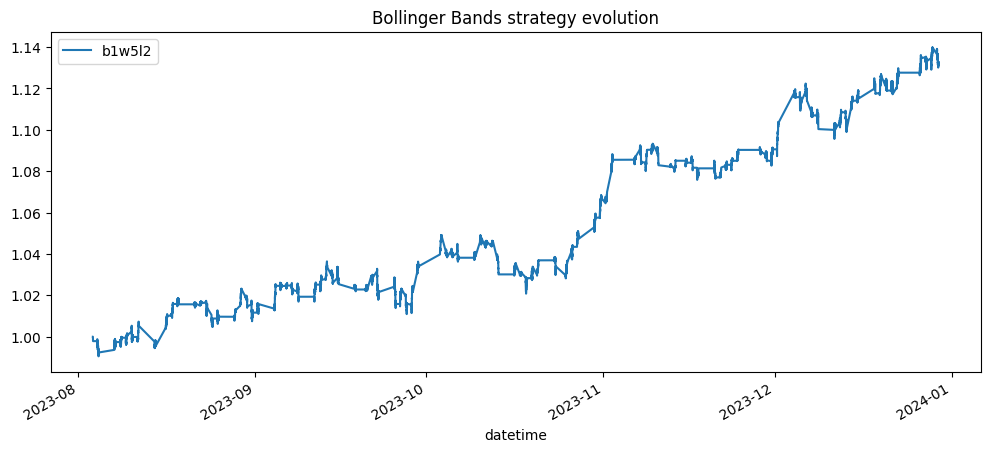

In [ ]:
# strategy_ts_oos['b1w5l2']['signal'].plot(figsize=(12,5),title='Bollinger Bands discrete signal evolution')
(1+BB_meanrev_ts_oos['strategy_returns']['b1w5l2']).cumprod().plot(figsize=(12,5),title='Bollinger Bands strategy evolution')

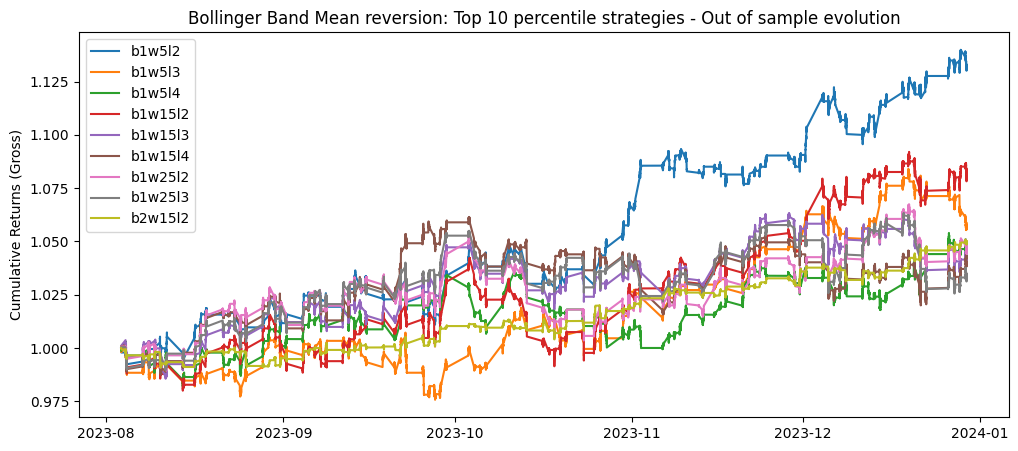

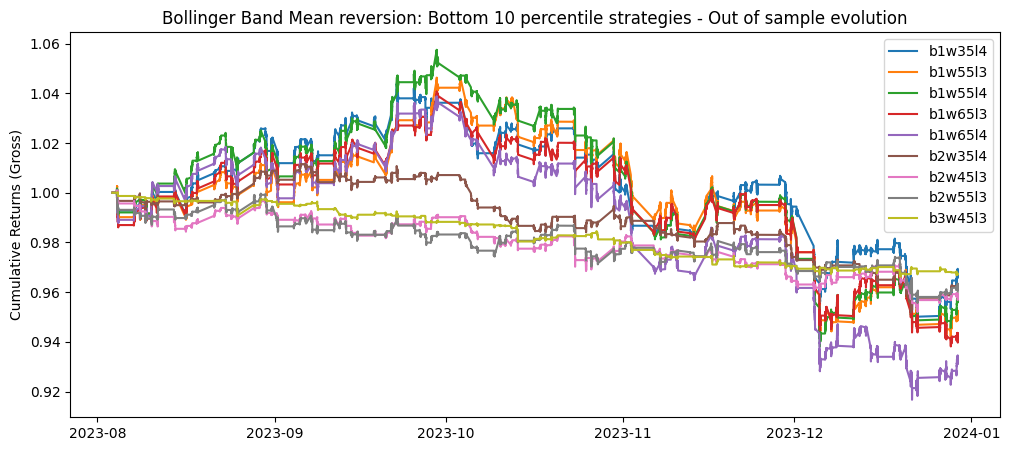

In [ ]:
percentile_charts(BB_meanrev_ts_oos,90,'Bollinger Band Mean reversion')

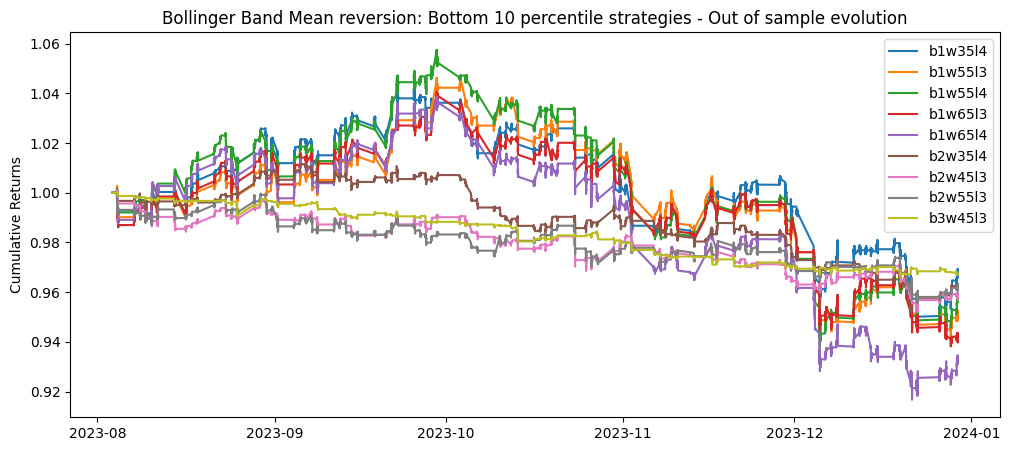

In [ ]:
# Get final values for all strategies
final_values = [data.iloc[-1,0] for data in BB_meanrev_ts_oos['cumulative_returns'].values()]

# Calculate 90th percentile
percentile_10 = np.percentile(final_values, 10)

plt.figure(figsize=(12, 5))
for strategy, data in BB_meanrev_ts_oos['cumulative_returns'].items():
    if data.iloc[-1,0] < percentile_10:
        plt.plot(data, label=strategy)  # Plot data with strategy as label

plt.title('Bollinger Band Mean reversion: Bottom 10 percentile strategies - Out of sample evolution')
plt.ylabel('Cumulative Returns')  # Add y-axis label
plt.legend()  # Display legend to identify strategies
plt.show()

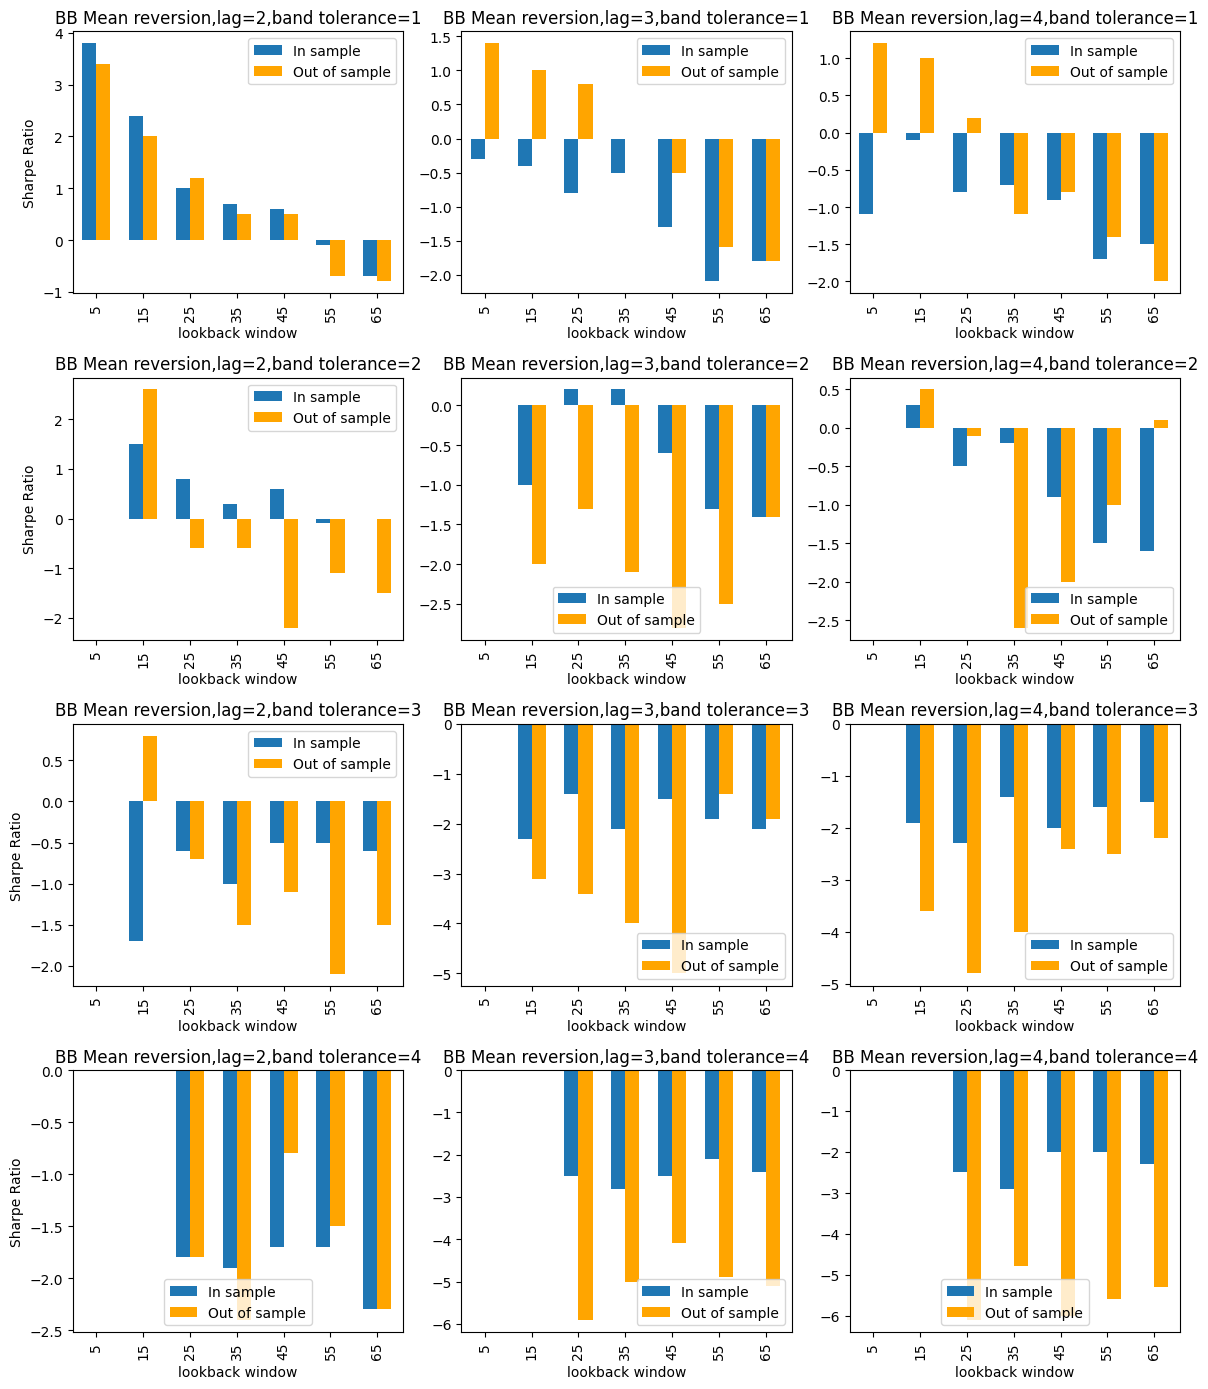

In [ ]:
robust_attribute_dict ={
    'y':'Sharpe Ratio', # could be changed to max drawdown, sortino ratio, etc
    'x':'lookback window',
    'row':'lag',
    'col':'band tolerance'
}

plot_robustness(BB_meanrev_is,BB_meanrev_oos,robust_attribute_dict,label='BB Mean reversion')

- There is rather a strong trend behaviour (Mean reversion sharpe is quite negative) at higher lags as mean reversion alpha decays very fast. Same behaviour at higher Bollinger bands (2 and beyond). Just shows that prices are not going to revert to mean at longer periods and beyond certain bands. Prices revert to mean very fast (lag 1 or 2 max).
- Caveat: Our holding period is usually short. We could make our exit strategy more smarter and see what the effect is for holding for longer?

In [ ]:
lookback_window = {'start':15,
                   'step':15,
                   'end':125}# exclusive
band_tolerance = {'start':1,
                  'step':1,
                  'end':4}#inclusive
lags = {'start':2, #Shift the signal by 2 or more for realistic implementation
        'step':1,
        'end':4}#inclusive

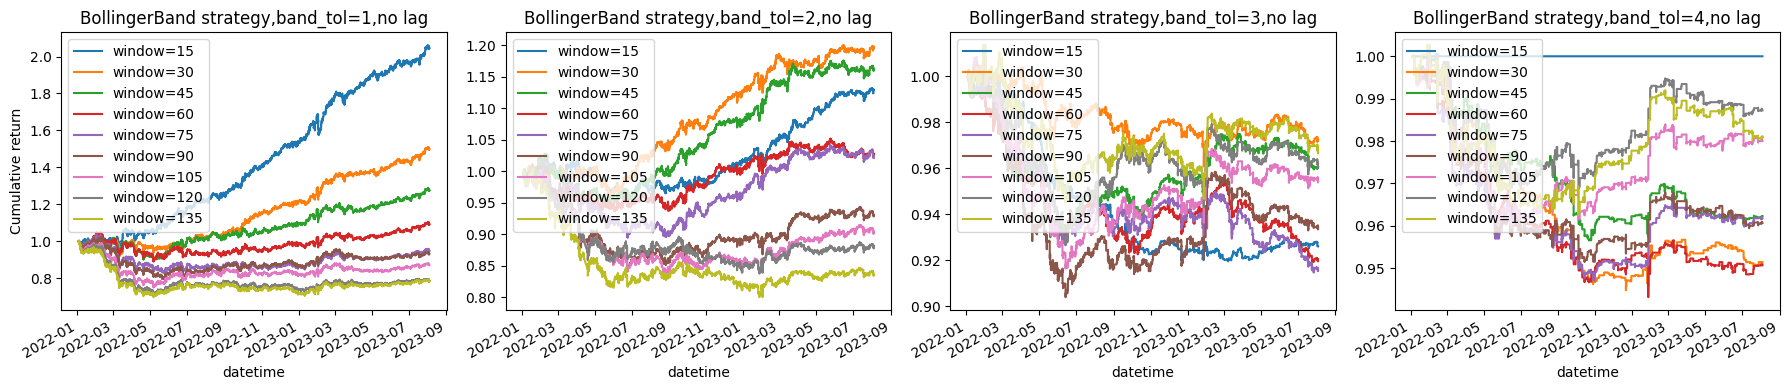

Indicator  Strategy  band tolerance  lookback window  lag  \
0    BollingerBand  Momentum               1               15    2   
1    BollingerBand  Momentum               1               15    3   
2    BollingerBand  Momentum               1               15    4   
3    BollingerBand  Momentum               1               30    2   
4    BollingerBand  Momentum               1               30    3   
..             ...       ...             ...              ...  ...   
103  BollingerBand  Momentum               4              120    3   
104  BollingerBand  Momentum               4              120    4   
105  BollingerBand  Momentum               4              135    2   
106  BollingerBand  Momentum               4              135    3   
107  BollingerBand  Momentum               4              135    4   

     holding period  Sharpe Ratio  Sortino Ratio  Max Drawdown  VaR(95%)  \
0               3.5          -2.7           -2.4      0.555894 -0.000544   
1               3.5           0.1            0.1      0.049048 -0.000536   
2               3.5          -0.2           -0.2      0.145074 -0.000535   
3               5.1          -1.5           -1.4      0.325868 -0.000551   
4               5.1           0.4            0.4      0.023105 -0.000543   
..              ...           ...            ...           ...       ...   
103             2.7          -0.2           -0.0      0.008253  0.000000   
104             2.7          -0.7           -0.1      0.008934  0.000000   
105             2.8          -1.5           -0.1      0.033584  0.000000   
106             2.8          -0.6           -0.1      0.006709  0.000000   
107             2.8          -1.3           -0.1      0.022065  0.000000   

     Expected shortfall(95%)  Ann. return  Ann. vol  
0                  -0.000949       -0.336     0.133  
1                  -0.000935        0.030     0.131  
2                  -0.000932       -0.003     0.128  
3                  -0.000964       -0.187     0.136  
4                  -0.000952        0.078     0.136  
..                       ...          ...       ...  
103                -0.000001        0.016     0.019  
104                -0.000001        0.007     0.018  
105                -0.000002       -0.010     0.020  
106                -0.000001        0.009     0.019  
107                -0.000001       -0.003     0.018  

[108 rows x 13 columns]

In [ ]:
BB_mom_is,BB_mom_ts_is = test_robustness(data_ins.copy(),
                                         indicator='BollingerBand',
                                         multiplier= -1, # 1 for mean reversion, -1 for momentum
                                         lookback_window=lookback_window,
                                         band_tol=band_tolerance, lags=lags)

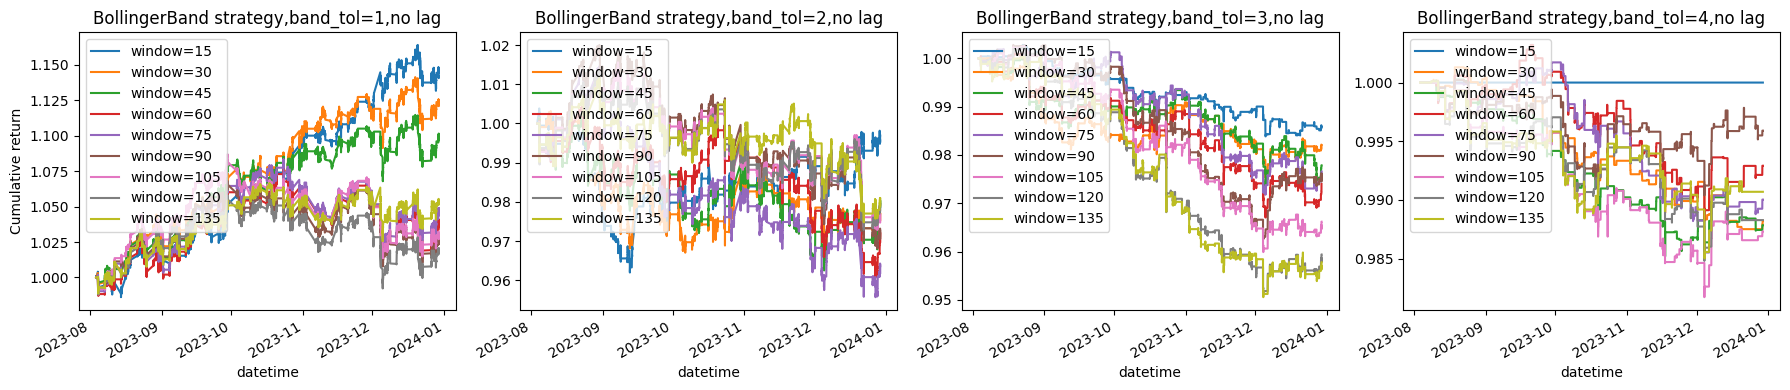

Indicator  Strategy  band tolerance  lookback window  lag  \
0    BollingerBand  Momentum               1               15    2   
1    BollingerBand  Momentum               1               15    3   
2    BollingerBand  Momentum               1               15    4   
3    BollingerBand  Momentum               1               30    2   
4    BollingerBand  Momentum               1               30    3   
..             ...       ...             ...              ...  ...   
103  BollingerBand  Momentum               4              120    3   
104  BollingerBand  Momentum               4              120    4   
105  BollingerBand  Momentum               4              135    2   
106  BollingerBand  Momentum               4              135    3   
107  BollingerBand  Momentum               4              135    4   

     holding period  Sharpe Ratio  Sortino Ratio  Max Drawdown  VaR(95%)  \
0               3.3          -2.5           -2.2      0.097297 -0.000362   
1               3.3          -1.4           -1.4      0.071604 -0.000353   
2               3.3          -1.5           -1.4      0.066416 -0.000351   
3               4.9          -1.5           -1.4      0.063047 -0.000366   
4               4.9          -0.8           -0.8      0.048178 -0.000360   
..              ...           ...            ...           ...       ...   
103             3.1           0.7            0.1      0.000886  0.000000   
104             3.1           0.4            0.1      0.003116  0.000000   
105             3.2          -0.4           -0.0      0.001335  0.000000   
106             3.2           0.9            0.2      0.000886  0.000000   
107             3.2           1.2            0.2      0.004172  0.000000   

     Expected shortfall(95%)  Ann. return  Ann. vol  
0                  -0.000625       -0.200     0.090  
1                  -0.000612       -0.104     0.085  
2                  -0.000603       -0.102     0.082  
3                  -0.000614       -0.106     0.085  
4                  -0.000608       -0.045     0.083  
..                       ...          ...       ...  
103                -0.000001        0.028     0.011  
104                -0.000001        0.025     0.011  
105                -0.000002        0.015     0.014  
106                -0.000001        0.031     0.012  
107                -0.000001        0.034     0.011  

[108 rows x 13 columns]

In [ ]:
BB_mom_oos,BB_mom_ts_oos = test_robustness(data_oos.copy(),
                                           indicator='BollingerBand',
                                           multiplier= -1, # 1 for mean reversion, -1 for momentum
                                           lookback_window=lookback_window,
                                           band_tol=band_tolerance, lags=lags)

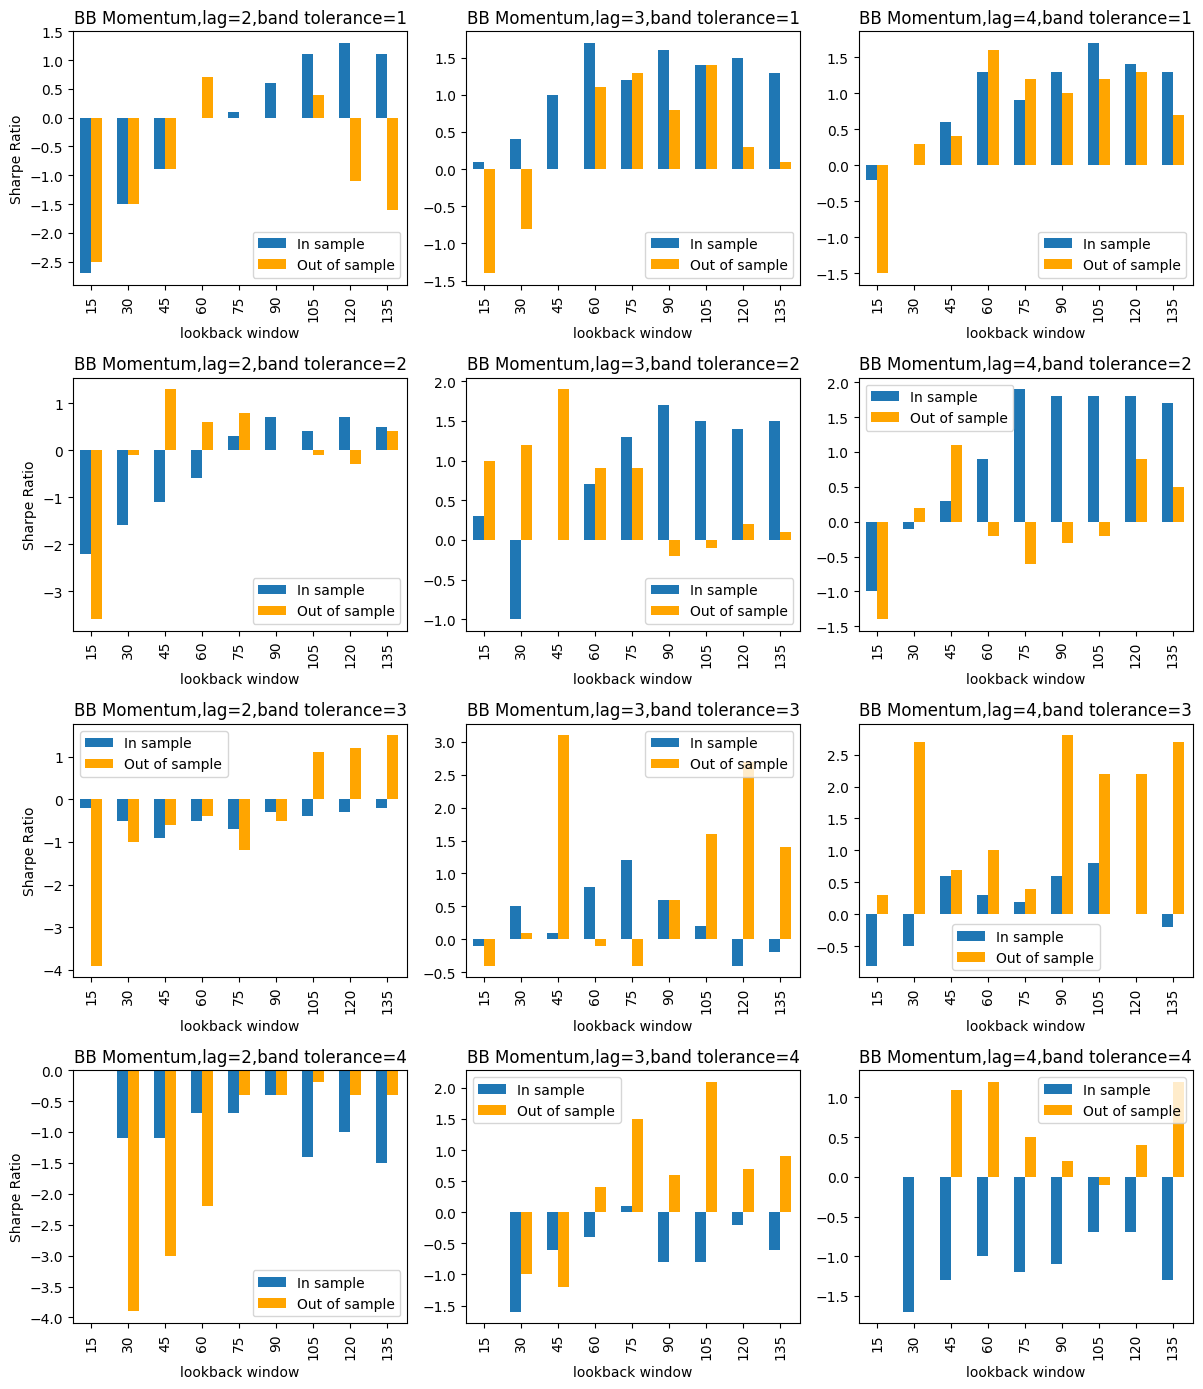

In [ ]:
robust_attribute_dict ={
    'y':'Sharpe Ratio', # could be changed to max drawdown, sortino ratio, etc
    'x':'lookback window',
    'row':'lag',
    'col':'band tolerance'
}

# Check that you are passing correct insample and out of sample dataframes
# Attribute dict argument is unchanged unless you'd like to plot max drawdown,etc

### UPDATE the label below to your strategy

plot_robustness(BB_mom_is,BB_mom_oos,robust_attribute_dict,label='BB Momentum')


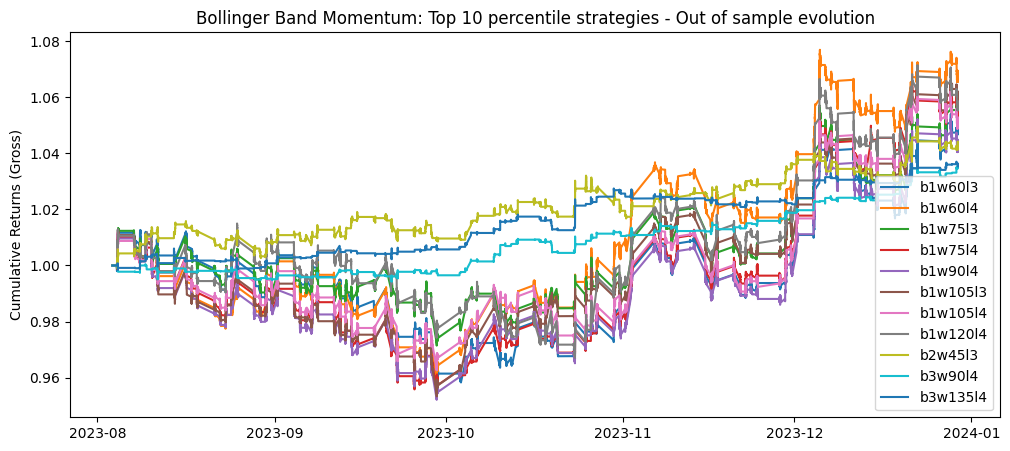

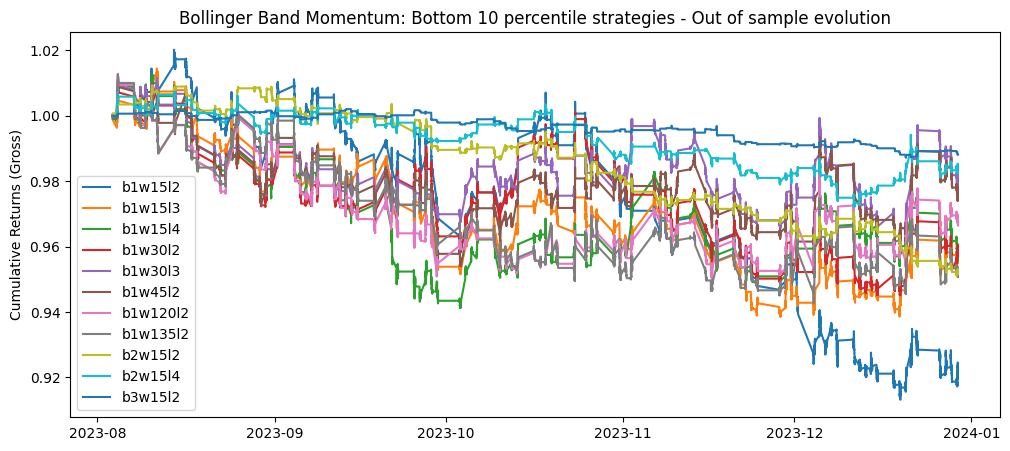

In [ ]:
percentile_charts(BB_mom_ts_oos,90,'Bollinger Band Momentum')

1. Bollinger Bands (Upper/Lower crossing)
2. Z-Score of the price relative to moving average
3. RSI (Relative Strength Index) below 30 (oversold)
4. Williams %R (Overbought/oversold)
5. Commodity Channel Index (CCI) crossing threshold
6. Moving Average Convergence Divergence (MACD)
7. Price crossing VWAP (Volume-Weighted Average Price)
8. Price Distance from Exponential Moving Average (EMA)
9. Price Distance from Simple Moving Average (SMA)
10. Chaikin Money Flow crossing zero
11. Price-Volume Trend (PVT)
12. Volume Spike Reversion
13. ATR Bands crossing (Average True Range)
14. Donchian Channel Reversion
15. Price Relative to Keltner Channel
16. Price crossing Ichimoku Cloud baseline
17. Money Flow Index (MFI) reversion
18. On-Balance Volume (OBV) Divergence
19. Parabolic SAR Reversion
20. Force Index Reversion
21. Stochastic Oscillator (Crossing 20/80 levels)
22. Directional Movement Index (DMI) Cross
23. Chande Momentum Oscillator (CMO) crossing thresholds
24. Intraday Volume Weighted Moving Average
25. Intraday Price Spike Reversion